In [23]:
from sklearn.pipeline import Pipeline
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [3]:
milk = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/milk.csv', index_col=0)
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [4]:


from sklearn.decomposition import PCA


scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
prcomp = PCA().set_output(transform='pandas')
prcomp

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [5]:
pca_data = prcomp.fit_transform(milk_scaled)
pca_data

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


In [6]:
pca_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

#### Percentage of Variance Explained

In [7]:
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [8]:
prcomp.explained_variance_ratio_ * 100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

#### Cumulative Sum of PCs Variance

In [9]:
np.cumsum(prcomp.explained_variance_)

array([4.0404117 , 4.96478408, 5.09907497, 5.20176356, 5.20833333])

In [10]:
np.cumsum(prcomp.explained_variance_ratio_ * 100)

array([ 77.57590469,  95.32385438,  97.90223934,  99.87386037,
       100.        ])

#### Bi-Plot

In [11]:
! pip install pca

[12-12-2025 08:20:06] [pca.pca] [INFO] Extracting column labels from dataframe.
[12-12-2025 08:20:06] [pca.pca] [INFO] Extracting row labels from dataframe.
[12-12-2025 08:20:06] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 5 columns of the input data.
[12-12-2025 08:20:06] [pca.pca] [INFO] Fit using PCA.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute loadings and PCs.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute explained variance.
[12-12-2025 08:20:06] [pca.pca] [INFO] The top 2 principal component(s) explains >= 95.00% of the explained variance.
[12-12-2025 08:20:06] [pca.pca] [INFO] The PCA reduction is performed on 5 variables (columns) of the input dataframe.
[12-12-2025 08:20:06] [pca.pca] [INFO] Fit using PCA.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute loadings and PCs.
[12-12-2025 08:20:06] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[12-12-2025 08:20:06] [pca.pca] [INFO]

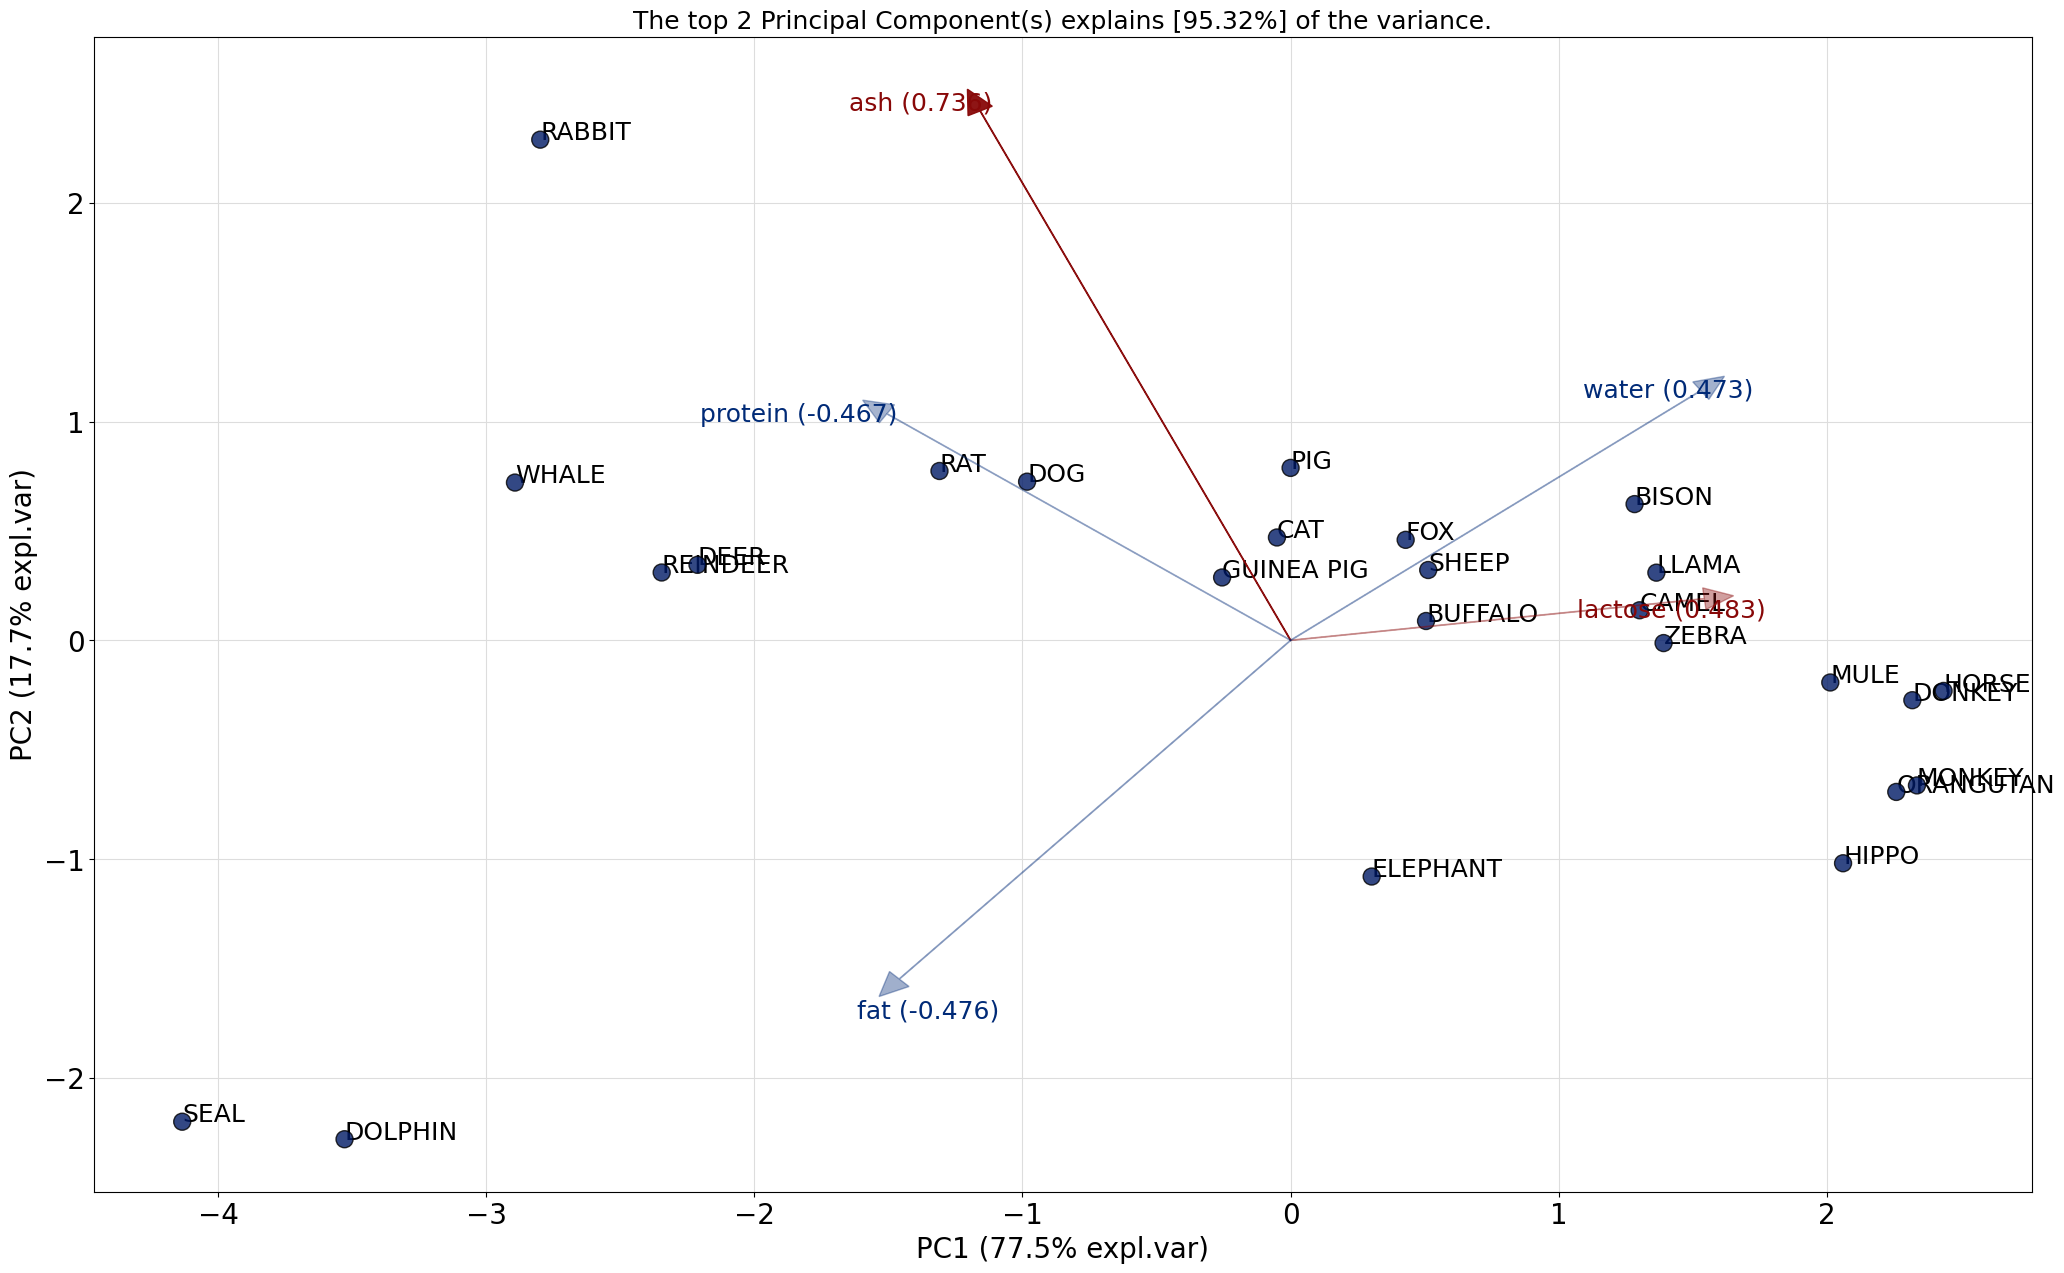

In [12]:
from pca import pca

model=pca()
results = model.fit_transform(milk_scaled)
model.biplot(label=True, legend=True)
for i in np.arange(0, milk.shape[0]):
    plt.text(pca_data.values[i,0], pca_data.values[i,1], list(milk.index)[i])
plt.show()

[12-12-2025 08:20:06] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 5 columns of the input data.
[12-12-2025 08:20:06] [pca.pca] [INFO] Fit using PCA.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute loadings and PCs.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute explained variance.
[12-12-2025 08:20:06] [pca.pca] [INFO] The top 2 principal component(s) explains >= 95.00% of the explained variance.
[12-12-2025 08:20:06] [pca.pca] [INFO] The PCA reduction is performed on 5 variables (columns) of the input dataframe.
[12-12-2025 08:20:06] [pca.pca] [INFO] Fit using PCA.
[12-12-2025 08:20:06] [pca.pca] [INFO] Compute loadings and PCs.
[12-12-2025 08:20:06] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[12-12-2025 08:20:06] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[12-12-2025 08:20:06] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[12

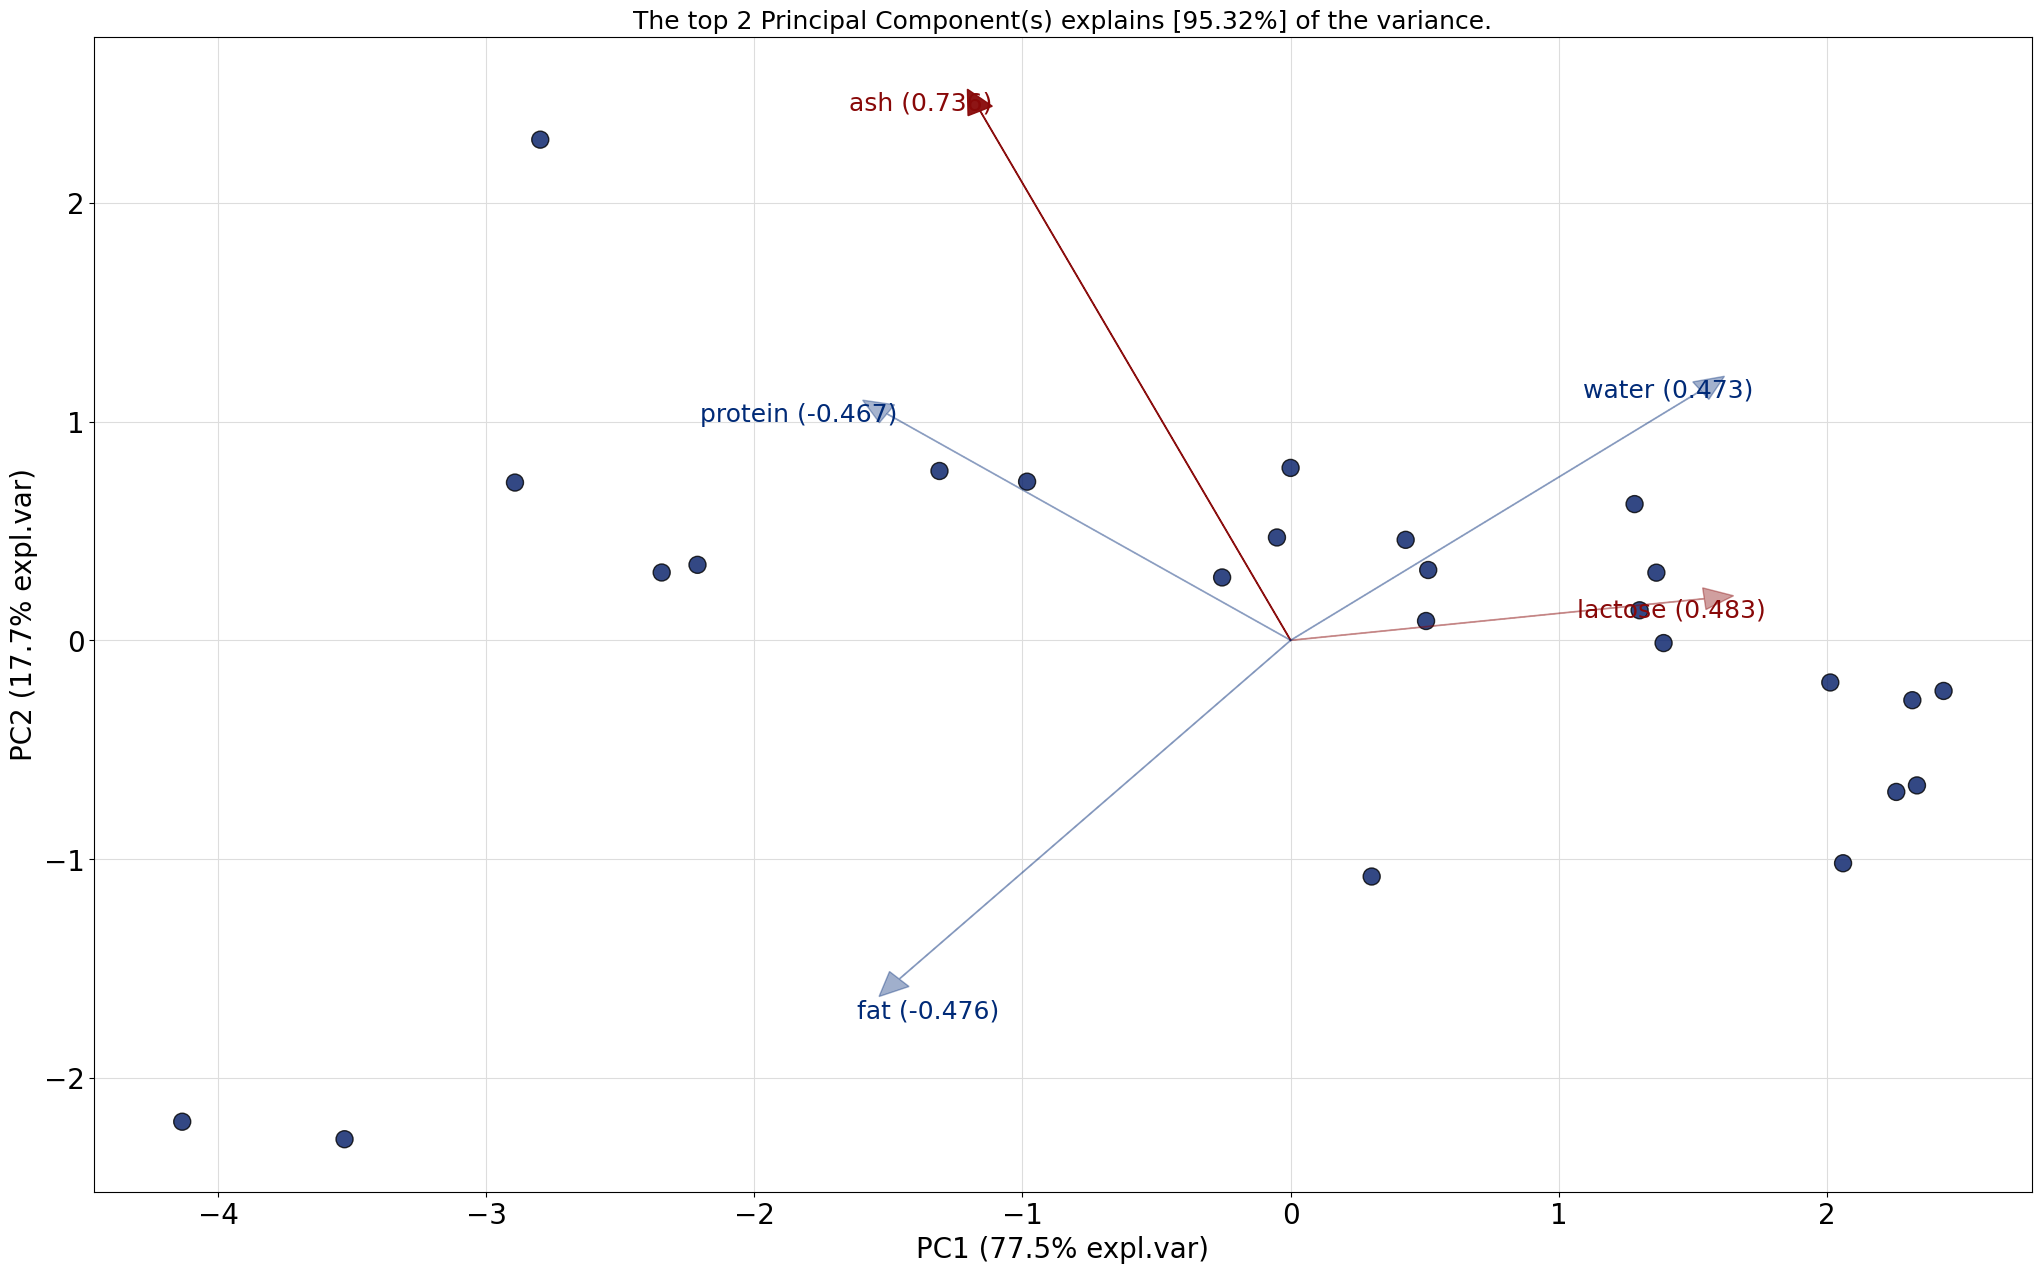

In [13]:

model=pca()
results = model.fit_transform(milk_scaled, col_labels=milk.columns, row_labels = list(milk.index))
model.biplot(label=True, legend=True)
# for i in np.arange(0, milk.shape[0]):
#     plt.text(pca_data.values[i,0], pca_data.values[i,1], list(milk.index)[i])
plt.show()

scaling and pca on IRIS data

In [15]:
iris = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
le  = LabelEncoder()
iris.species = le.fit_transform(iris.Species)

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_12468\1603092786.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris.species = le.fit_transform(iris.Species)


In [ ]:
X,y = iris.drop('Species',axis=1),iris['Species']
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [21]:
ss = StandardScaler().set_output(transform='pandas')
df_scl = ss.fit_transform(X)
df_scl

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [25]:
pc = PCA().set_output(transform="pandas")
pc_data = pc.fit_transform(X)
pc_data['Species'] = y
pc_data

,pca0,pca1,pca2,pca3,Species
0,-2.684126,0.319397,-0.027915,0.002262,setosa
1,-2.714142,-0.177001,-0.210464,0.099027,setosa
2,-2.888991,-0.144949,0.017900,0.019968,setosa
3,-2.745343,-0.318299,0.031559,-0.075576,setosa
4,-2.728717,0.326755,0.090079,-0.061259,setosa
...,...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196,virginica
146,1.527167,-0.375317,-0.121898,0.254367,virginica
147,1.764346,0.078859,0.130482,0.137001,virginica
148,1.900942,0.116628,0.723252,0.044595,virginica


<Axes: xlabel='pca0', ylabel='pca1'>

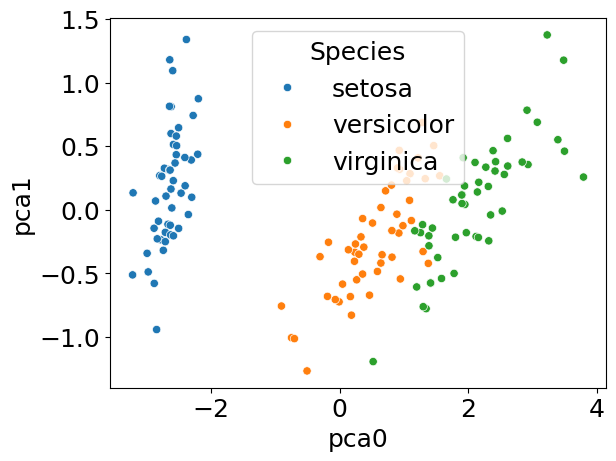

In [26]:

sns.scatterplot(data=pc_data,x='pca0',y='pca1',hue='Species')

In [33]:
# Using Logistic Regression with PCA as a data transformer

x, y = iris.drop('Species', axis = 1), iris.Species

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

ss = StandardScaler()
x_trn_scl = ss.fit_transform(x_train)
x_tst_scl = ss.transform(x_test)

pca = PCA().set_output(transform='pandas')
x_trn_pca = pca.fit_transform(x_trn_scl)
x_tst_pca = pca.transform(x_tst_scl)

lr = LogisticRegression()
lr.fit(x_trn_pca.iloc[:,:2],y_train)
y_pred = lr.predict(x_tst_pca.iloc[:,:2])
y_pred_proba = lr.predict_proba(x_tst_pca.iloc[:,:2])

In [34]:
print(accuracy_score(y_test,y_pred))
print(log_loss(y_test,y_pred_proba))

0.8888888888888888
0.20790417014553408


In [36]:
ss = StandardScaler()
pca = PCA(n_components=2)
lr = LogisticRegression()

pipe = Pipeline(steps=[
    ('SS', ss),
    ('PCAAA', pca),
    ('LR', lr)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8888888888888888


In [37]:
hr = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [62]:
X,y = hr.drop('left',axis=1),hr['left']
ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')
ss = StandardScaler().set_output(transform='pandas')

from sklearn.compose import ColumnTransformer, make_column_selector

col_trnf = ColumnTransformer([
                                ('OHE', ohe, make_column_selector(dtype_include=object))],
                                # ('SS', ss, make_column_selector(dtype_exclude=object))],
                              remainder='passthrough', verbose_feature_names_out=False)

col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)

In [65]:
X_csl = ss.fit_transform(X)
pca = PCA()
pca_data = pca.fit_transform(X_csl)
pca_data

array([[ 2.06256663, -1.2779161 ,  1.7173237 , ..., -0.61713742,
         0.07364751,  0.08085943],
       [-2.17901293,  1.34986778,  1.80565911, ...,  0.06950144,
         0.09491598,  0.08987389],
       [ 0.70611129,  2.35491883,  1.78387064, ...,  0.28461307,
         0.04717723,  0.08198619],
       ...,
       [ 2.13298092, -1.34727481, -0.85390998, ..., -0.50842322,
         0.07252157,  0.09348045],
       [ 0.38533259,  3.27577068, -0.83634512, ..., -0.3548851 ,
         0.03233039,  0.09521731],
       [ 2.08511032, -1.22188011, -0.85210446, ..., -0.62621709,
         0.07361595,  0.09441508]], shape=(14995, 18))

In [66]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 10.42723133,  20.58793491,  27.95567097,  34.76490283,
        41.43340638,  47.76274027,  53.86705251,  59.78971986,
        65.6726812 ,  71.52370417,  77.29664846,  82.69834762,
        87.55599268,  92.10660041,  95.62030665,  98.658159  ,
        99.46053041, 100.        ])